In [1]:
!pip install transformers

In [4]:
!pip install wordcloud

In [1]:
!pip install gensim

In [2]:
!pip install pyLDAvis

In [ ]:
pip install --upgrade scipy

In [24]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel
from wordcloud import WordCloud

In [8]:
train = pd.read_csv('/kaggle/input/testtrainsample/train.csv')
test = pd.read_csv('/kaggle/input/testtrainsample/test.csv')

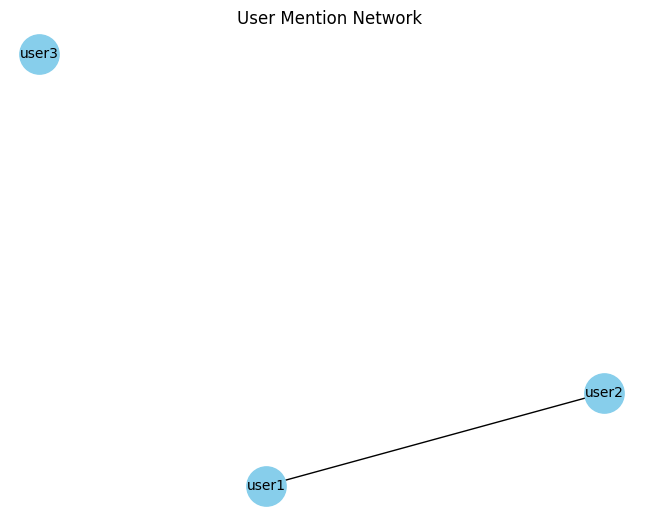

In [9]:
import re
import networkx as nx

# Sample DataFrame
# Replace this with your actual 'train' DataFrame
# Assuming 'train' contains the 'text' column
sample_data = pd.DataFrame({
    'text': ["I mentioned @user1 and @user2 in this tweet.",
             "Another tweet by @user3.",
             "No mentions here."]
})

# Create a NetworkX graph
G = nx.Graph()

# Function to extract user mentions from a text
def extract_user_mentions(text):
    return re.findall(r'@(\w+)', text)

# Add nodes (user mentions) to the graph
for index, row in sample_data.iterrows():
    mentions = extract_user_mentions(row['text'])
    for mention in mentions:
        G.add_node(mention)

# Add edges between users who are mentioned together
for index, row in sample_data.iterrows():
    mentions = extract_user_mentions(row['text'])
    for i in range(len(mentions)):
        for j in range(i + 1, len(mentions)):
            G.add_edge(mentions[i], mentions[j])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_color='black')
plt.title("User Mention Network")
plt.show()

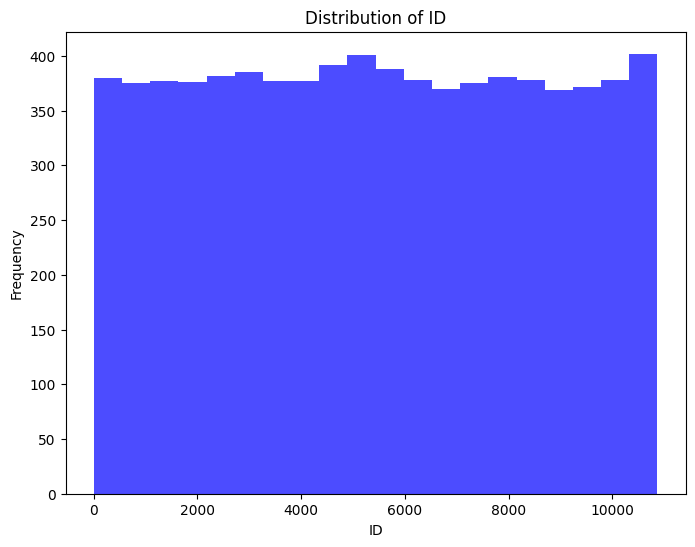

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(train['id'], bins=20, color='blue', alpha=0.7)
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.title('Distribution of ID')
plt.show()

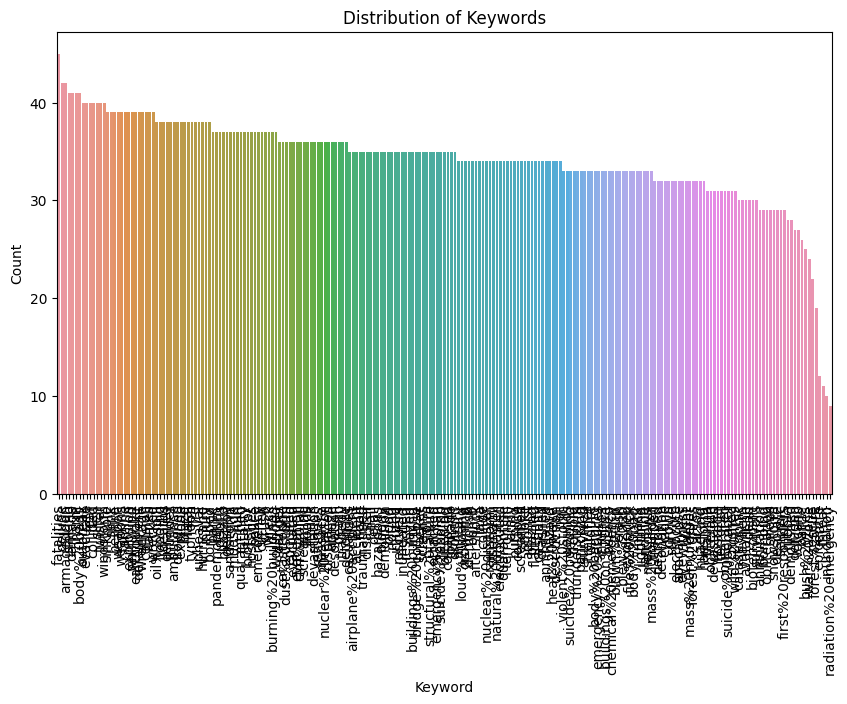

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='keyword', order=train['keyword'].value_counts().index)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Distribution of Keywords')
plt.xticks(rotation=90)
plt.show()

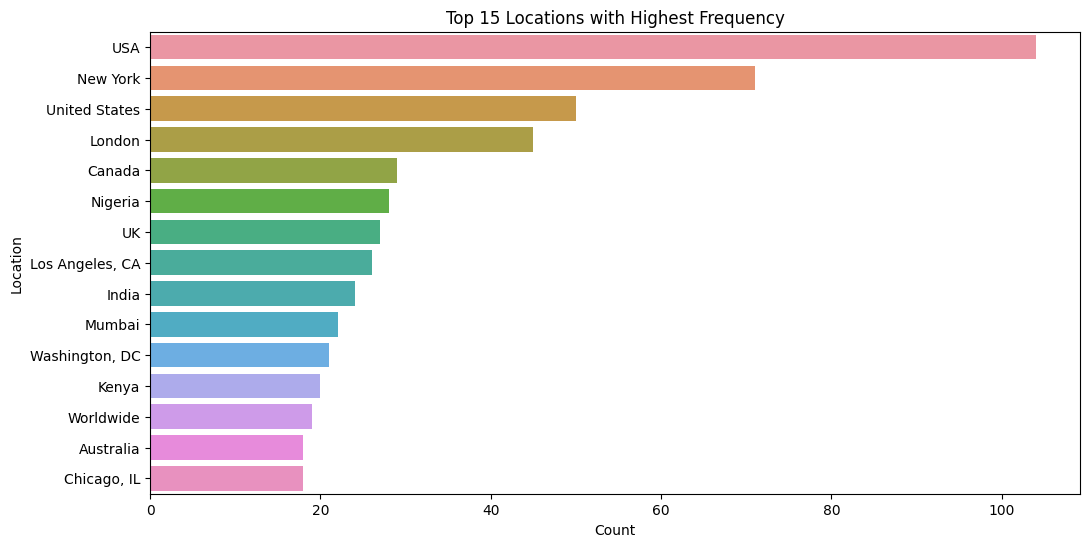

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, y='location', order=train['location'].value_counts().index[:15])
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 15 Locations with Highest Frequency')
plt.show()

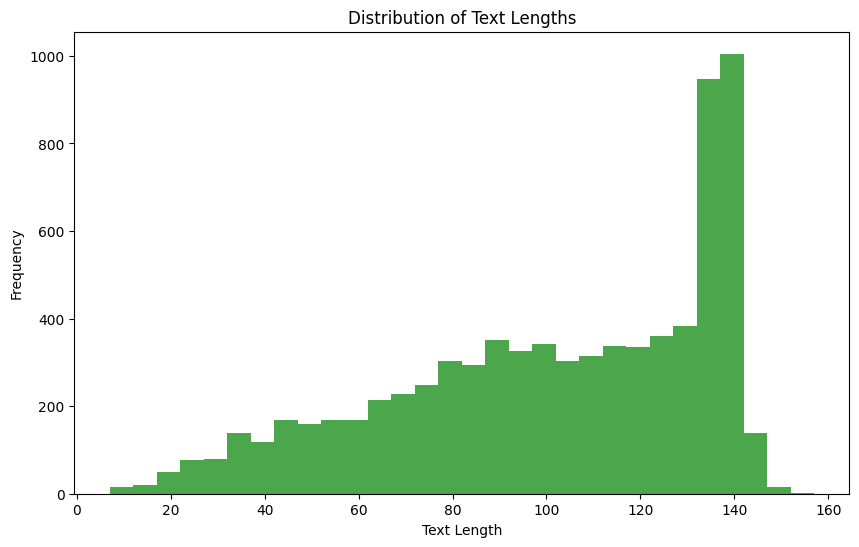

In [15]:
train['text_length'] = train['text'].apply(lambda x: len(x))

# Create a histogram for text lengths
plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=30, color='green', alpha=0.7)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

# Optional: Remove the 'text_length' column if you don't need it in your DataFrame
train.drop(columns=['text_length'], inplace=True)

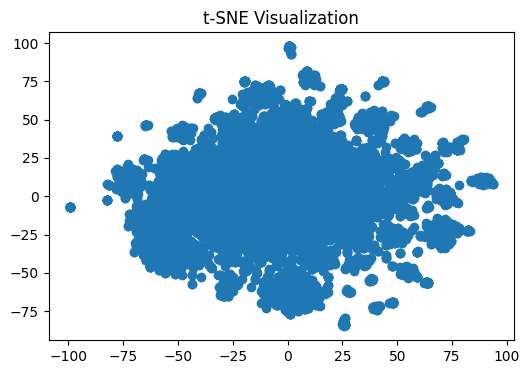

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your 'train' DataFrame with a 'text' column
# Replace with your actual text data column and data preprocessing as needed
text_data = train['text']

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

# Step 2: Apply TruncatedSVD for Dimensionality Reduction
svd = TruncatedSVD(n_components=50)  # Choose the number of components you want
tfidf_features_svd = svd.fit_transform(tfidf_features)

# Step 3: Apply t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_features_svd)

# Create a new DataFrame with the reduced dimensions from t-SNE
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne_1', 'tsne_2'])

# Visualize t-SNE results (scatter plot)
plt.figure(figsize=(6, 4))
plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'])
plt.title('t-SNE Visualization')
plt.show()


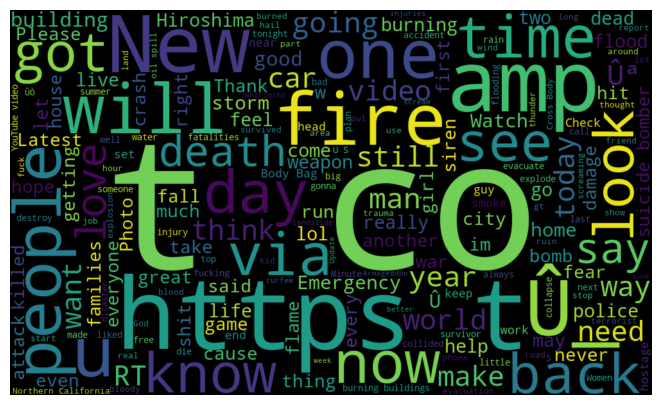

In [11]:
def generate_word_cloud(text):
  combined_text = ' '.join(text)
  wordcloud = WordCloud(width = 1000, height = 600, background_color = 'black').generate(combined_text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # Turn off the axis
  plt.show()
generate_word_cloud(train['text'])

In [19]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for each unique value in the "id," "keyword," "location," and "text" columns
for column_name in ["id", "keyword", "location", "text"]:
    unique_values = train[column_name].unique()
    for value in unique_values:
        G.add_node(value, label=column_name)

# Define relationships between nodes (e.g., "id" to "keyword")
# You can customize this part based on the relationships you want to represent
# Here's a simple example connecting "id" to "keyword" and "location" to "text":
for index, row in train.iterrows():
    G.add_edge(row["id"], row["keyword"])
    G.add_edge(row["location"], row["text"])

# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
plt.title("Network Graph of Twitter Data")
plt.show()


KeyboardInterrupt: 

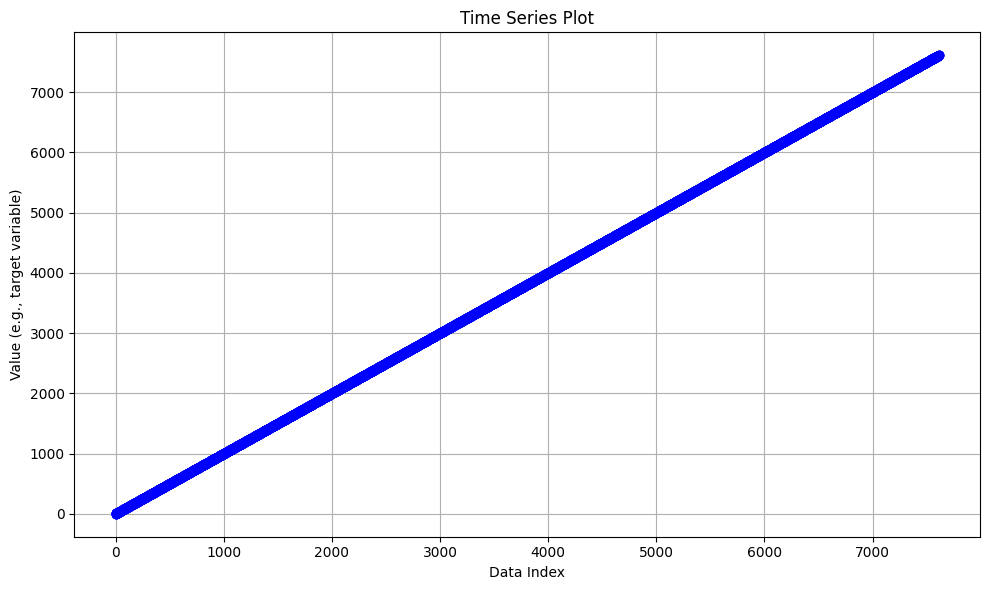

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, marker='o', linestyle='-', color='b')
plt.title('Time Series Plot')
plt.xlabel('Data Index')
plt.ylabel('Value (e.g., target variable)')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
train = pd.read_csv('/kaggle/input/testtrainsample/train.csv')
test = pd.read_csv('/kaggle/input/testtrainsample/test.csv')

In [38]:
train["length"] = train["text"].apply(lambda x : len(x))
test["length"] = test["text"].apply(lambda x : len(x))

In [39]:
import plotly.express as px

# Assuming 'train' is your DataFrame
top_keywords = train['keyword'].value_counts().head(15)

fig = px.bar(top_keywords, x=top_keywords.index, y=top_keywords.values, title="Top 15 Keywords")
fig.update_xaxes(title_text="Keyword")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [ ]:
train.head()

In [17]:
train["length"].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [7]:
train['text'] = train['text'].apply(lambda x: " ".join([word.lower() for word in str(x).split()]))
test['text'] = test['text'].apply(lambda x: " ".join([word.lower() for word in str(x).split()]))

In [8]:
import re
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

def clean(tweet):

    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)

    Special = '@#!?+&*[]-%:/()$=><|{}^'
    for s in Special:
        tweet = tweet.replace(s, "")

    return tweet

train['text'] = train['text'].apply(lambda s : clean(s))
test['text'] = test['text'].apply(lambda s : clean(s))
train['text'] = train['text'].apply(lambda s : remove_html(s))
test['text'] = test['text'].apply(lambda s : remove_html(s))
train['text'] = train['text'].apply(lambda s : remove_emoji(s))
test['text'] = test['text'].apply(lambda s : remove_emoji(s))
train['text'] = train['text'].apply(lambda s : decontraction(s))
test['text'] = test['text'].apply(lambda s : decontraction(s))

In [10]:
import tensorflow as tf
seq_len = 256
batch_size = 40
num_samples = len(train)
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

train_tokens = tokenizer(
    train['text'].tolist(),
    max_length=seq_len,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='np'
)
#one hot encoding
y_train = train['target'].values
labels = np.zeros((num_samples, y_train.max() + 1))
labels[np.arange(num_samples), y_train] = 1

dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'],
        train_tokens['attention_mask'],
        labels
    )
)

def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

dataset = dataset.map(map_func)
dataset = dataset.shuffle(10000).batch(batch_size=batch_size, drop_remainder=True)

split = 0.7
size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [ ]:
model = TFAutoModel.from_pretrained(model_name)


input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')


embeddings = model(input_ids, attention_mask=mask)[0]
embeddings = embeddings[:, 0, :]

x = tf.keras.layers.Dense(512, activation='relu')(embeddings)

y = tf.keras.layers.Dense(2, activation='softmax', name='outputs')(x)

bert_model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)



optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.BinaryAccuracy()

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

history = bert_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8,
    batch_size=30
)

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/8
133/133 [==============================] - 216s 1s/step - loss: 0.4789 - binary_accuracy: 0.7729 - val_loss: 0.3458 - val_binary_accuracy: 0.8623
Epoch 2/8
133/133 [==============================] - 175s 1s/step - loss: 0.3844 - binary_accuracy: 0.8383 - val_loss: 0.3193 - val_binary_accuracy: 0.8724
Epoch 3/8
133/133 [==============================] - 175s 1s/step - loss: 0.3256 - binary_accuracy: 0.8660 - val_loss: 0.2911 - val_binary_accuracy: 0.8820
Epoch 4/8
133/133 [==============================] - 175s 1s/step - loss: 0.2979 - binary_accuracy: 0.8831 - val_loss: 0.2272 - val_binary_accuracy: 0.9167
Epoch 5/8


In [15]:
bert_model.evaluate(val_ds)

143/143 [==============================] - 39s 275ms/step - loss: 0.0482 - binary_accuracy: 0.9799


[0.0481700673699379, 0.9798951148986816]

In [16]:
# def prep_data(text):
#     tokens = tokenizer(
#         text, max_length=256, truncation=True,
#         padding='max_length',
#         add_special_tokens=True,
#         return_tensors='tf'
#     )
#     return {
#         'input_ids': tokens['input_ids'],
#         'attention_mask': tokens['attention_mask']
#     }

# test['target'] = None

# for i, row in test.iterrows():
#     tokens = prep_data(row['text'])
#     probs = bert_model.predict_on_batch(tokens)
#     pred = np.argmax(probs)
#     test.at[i, 'target'] = pred

# test['target'] = test['target'].astype(int)